In [1]:
%matplotlib widget
import csv
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 15)


# RFX Geometry Coils

In [2]:
def makeCircularCoil(num_points, radius, current, z=0):
    """
    Generates points for a circular coil.

    Args:
        num_points: Number of points to generate.
        radius: Radius of the circle.
        current: The constant 'i' value for each point.
        z: The constant z-coordinate.

    Returns:
        A NumPy array of points (x, y, z, i, None, None).
    """
    theta = np.linspace(0, 2 * np.pi, num_points)
    
    # Initial x and y coordinates on the XY plane
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    # Set the z, i, and placeholder columns
    z = np.full(num_points, z)
    i = np.full(num_points, current)
    
    # Stack the arrays to form the final point matrix
    points = np.vstack((x, y, z, i, [None] * num_points, [None] * num_points)).T
    return points

In [3]:
def addCoilToListDF(listdf,points,groupnumer,name,graph=None):    
    """
    Adds points to 'listdf' List

    Args:
        listdf: Dataframe list.
        points: List of 'points' to add.
        groupnumer: Metadata group number.
        name: Metadata group name.
        graph: (Optional) matplotlib axis variable to plot coil.

    Returns:
        'listdf' with appropriate addition
    """
    points[-1][3] = 0
    points[-1][4] = groupnumer
    points[-1][5] = name

    df = pd.DataFrame(points, columns=listdf.columns)
    if graph:
        graph.plot(df['x'],df['y'],df['z'], 
                   color= "r" if df['i'].iloc[0]>0 else "b",
                   marker = '', lw=1)
    
    listdf = pd.concat([listdf,df],ignore_index=True)
    return listdf

In [4]:
rfx = pd.DataFrame(columns=['x','y','z','i','group number', 'name']).astype({'x': float,'y': float,'z': float,'i': float,'group number': str,'name': str})

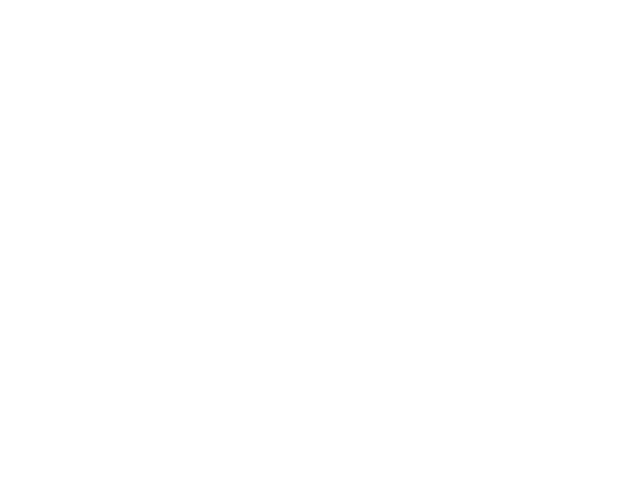

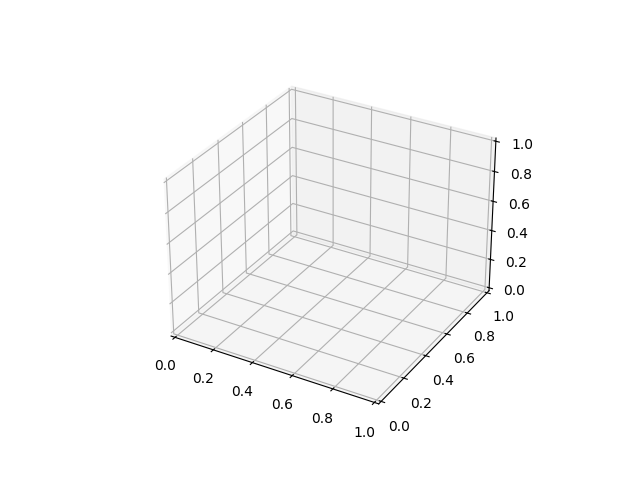

In [5]:
plt.clf()
#Graph Confinement
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d');

In [6]:
rfx = rfx.head(0) # Clean start

#For Hard Core Region
radius_major = 2 
radius_minor = 0.2
current = 2e6

num_points = 200

# Adding N central coils to structure
N = 12
for i in range(0,N):
    sinOffset = np.sin((2*np.pi) * (i/N)) * radius_minor
    cosOffset = np.cos((2*np.pi) * (i/N)) * radius_minor
    coil = makeCircularCoil(num_points = num_points,
                            radius = radius_major + sinOffset, 
                            current = current,
                            z = cosOffset)
    groupnumer = i
    name = 'HardCoreCoil'
    rfx = addCoilToListDF(rfx,coil,groupnumer,name,graph=ax)

In [7]:
#For External Core Region
radius_major = 2 
radius_minor = 0.5
current = -2e6

num_points = 200

# Adding N central coils to structure
N = 36
for i in range(0,N):
    sinOffset = np.sin((2*np.pi) * (i/N)) * radius_minor
    cosOffset = np.cos((2*np.pi) * (i/N)) * radius_minor
    coil = makeCircularCoil(num_points = num_points,
                            radius = radius_major + sinOffset, 
                            current = current,
                            z = cosOffset)

    groupnumer = i
    name = 'ExternalCoil'
    rfx = addCoilToListDF(rfx,coil,groupnumer,name,graph=ax)

In [8]:
plt.axis('equal')
plt.title('Confinement (in meters)')
# ax.view_init(elev=0, azim=45, roll=0)

# plt.show()
rfx.head()

,x,y,z,i,group number,name
0,2.0,0.0,0.2,2000000.0,None,None
1,1.999003178252348,0.063137099529621,0.2,2000000.0,None,None
2,1.996013706662987,0.126211262625347,0.2,2000000.0,None,None
3,1.991034565202212,0.18915961558969,0.2,2000000.0,None,None
4,1.984070717186516,0.251919410135435,0.2,2000000.0,None,None


In [9]:
plt.savefig('/home/monarch/Desktop/F/Duetelio/DebMech/Confinement (in meters).png', dpi=300)

In [10]:
save = rfx.copy(deep=True)

In [11]:
# Define the custom formatting and joining function for a row
def format_row(row):
    formatted_parts = []
    for col_name in ['x', 'y', 'z', 'i']:
        temp = f'{row[col_name]:.14e}'.upper()
        if temp[0]!='-': temp = ' '+temp
        formatted_parts += [temp]
    if row['group number'] and row['name']:
        formatted_parts.append(str(row['group number']))
        formatted_parts.append(str(row['name']))    
    return '  '.join(formatted_parts)

with open('/home/monarch/Desktop/F/Duetelio/DebMech/coils.rfx', 'w') as f:
    f.write('periods 1\n')
    f.write('begin filament \n')
    f.write('mirror NIL \n')
    for index, row in save.iterrows():
        f.write(format_row(row) + '\n')
    f.write('end \n')
    

# Plotting MAKEFILE Results

In [12]:
from scipy.io import netcdf_file
from libstell import makegrid

In [13]:
# file = netcdf_file('/home/monarch/Desktop/F/Duetelio/DebMech/mgrid_rfx.nc','r')
fileloc = '/home/monarch/Desktop/F/Duetelio/DebMech/mgrid_rfx.nc'
extcurfileloc = '/home/monarch/Desktop/F/Duetelio/DebMech/extcur.rfx'

In [14]:
read = makegrid.MAKEGRID.read_mgrid(filename = fileloc, extcur=extcurfileloc, nv =1, nfp =1 )

TypeError: MAKEGRID.read_mgrid() missing 1 required positional argument: 'self'